In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
import random

import numpy
import skimage.io
import scipy.sparse
import tqdm
import math

In [3]:
NEURONS = 300
MODIFIER = 5

In [ ]:
data = []
row = []
col = []
for i in tqdm.tqdm(range(NEURONS)):
    for j in range(NEURONS):
        if i != j:
            if numpy.random.binomial(1, math.exp(-(abs(i - j) - 1) / MODIFIER)):
                data.append(numpy.random.uniform(-1, 1))
                row.append(i)
                col.append(j)
data = numpy.array(data)
row = numpy.array(row)
col = numpy.array(col)

In [ ]:
matrix = scipy.sparse.csr_matrix((data, (row, col)), shape=(NEURONS, NEURONS))

In [ ]:
skimage.io.imshow(matrix.toarray())

In [ ]:
probabilities = numpy.zeros((NEURONS, NEURONS))

In [ ]:
probabilities.nbytes

In [ ]:
for i in range(NEURONS):
    for j in range(NEURONS):
        if i != j:
            probabilities[i, j] = 1 / abs(i - j)

In [ ]:
probabilities

In [ ]:
connections = numpy.random.binomial(1, probabilities, (NEURONS, NEURONS))

In [ ]:
connections

In [ ]:
skimage.io.imshow(connections)

In [ ]:
numpy.count_nonzero(connections)

In [ ]:
test = scipy.sparse.random(300, 300, density=0.1)

In [ ]:
test2 = numpy.random.uniform(-1, 1, (300, 300))

In [ ]:
skimage.io.imshow(test2)

In [ ]:
final = test.toarray() * test2

In [ ]:
skimage.io.imshow(final)

In [ ]:
numpy.count_nonzero(final)

In [ ]:
skimage.io.imshow(test.toarray())

In [ ]:
rand1 = numpy.random.uniform(-1, 1, (300, 300))
rand2 = numpy.random.uniform(-1, 1, (300, 300))

In [ ]:
cool = connections * rand1 * rand2

In [ ]:
skimage.io.imshow(cool)

In [ ]:
# coords = 

In [ ]:
numpy.vectorize(lambda i, j: 1 / abs(i - j) if i != j else 0., signature='(),()->()')(*numpy.meshgrid(range(10), range(10)))

In [4]:
def generate_connections(neurons):
    probabilities = numpy.vectorize(lambda i, j: 1 / abs(i - j) if i != j else 0.)(*numpy.meshgrid(range(neurons), range(neurons)))
    mask = numpy.random.binomial(1, probabilities, (neurons, neurons))
    multiplicand = numpy.random.uniform(-1, 1, (neurons, neurons))
    multiplier = numpy.random.uniform(0, 1, (neurons, neurons))
    connections = mask * multiplicand * multiplier
    return connections

In [5]:
W = generate_connections(1000)

In [6]:
W.shape

(1000, 1000)

In [7]:
W.nbytes

8000000

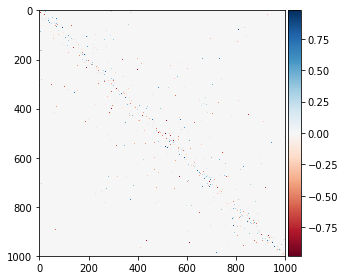

In [8]:
skimage.io.imshow(W)

In [9]:
numpy.count_nonzero(W) / W.size

0.013011

In [10]:
numpy.count_nonzero(W)

13011

In [11]:
numpy.eye(10)

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

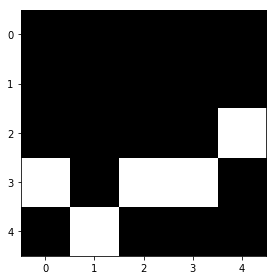

In [17]:
skimage.io.imshow(numpy.eye(5)[numpy.random.choice(5, 5)].swapaxes(0, 1))